In [29]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from skimage import color, restoration

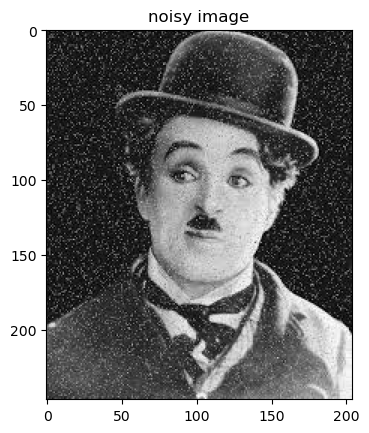

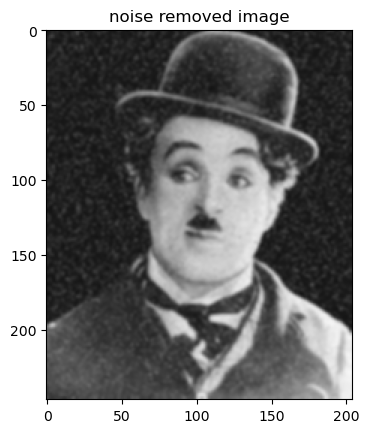

In [16]:
# Function to remove noise using Gaussian blur
image = cv2.imread('/Users/srijanratrey/Documents/Assignments/CV/charlie.jpeg')    
blurred_img = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imwrite('denoised_image.jpg', blurred_img)
plt.figure()
plt.title('noisy image')
plt.imshow(image)
plt.show()
plt.figure()
plt.title('noise removed image')
plt.imshow(blurred_img)
plt.show()

error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


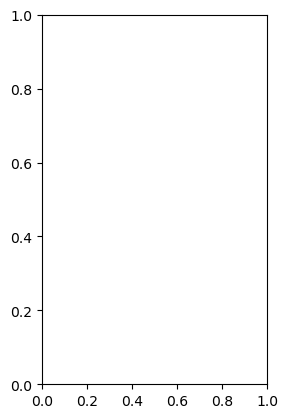

In [47]:
#from model import DeblurGAN
blurred_image = cv2.imread('/Users/srijanratrey/Documents/Assignments/CV/tower.jpeg',0)

blurred_image = blurred_image.astype(float)

# Define the Point Spread Function (PSF) for motion blur
psf_size = 15  # Adjust the size to match your image dimensions
psf = np.zeros((psf_size, psf_size))
psf[psf_size // 2, :] = 1.0 / psf_size  # Create a motion blur along the horizontal axis

# Normalize the PSF
psf /= psf.sum()
# Apply Richardson-Lucy deconvolution
reg = 0.01 
deconvolved_image = restoration.wiener(blurred_image, psf,reg) 

# Convert back to uint8 for visualization
deconvolved_image = deconvolved_image.astype(np.uint8)


# Save the deconvolved image
cv2.imwrite('deconvolved_image.jpg', deconvolved_image)
# Display the original and deblurred images using matplotlib
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred_image , cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(deblurred_image  , cv2.COLOR_BGR2RGB))
plt.title('Deblurred Image ')
plt.axis('off')

plt.show()


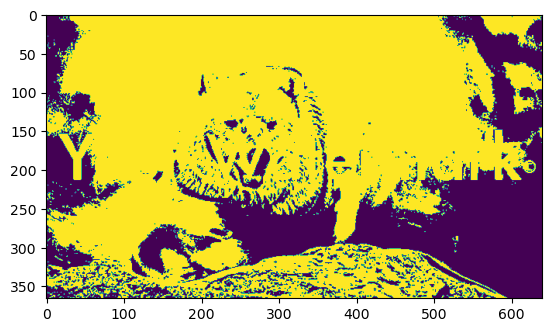

In [11]:
def back_rm(filename):
    # Load the image
    img = cv2.imread(filename)

    # Convert the image to grayscale
    gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Make a copy of the grayscale image
    bg = gr.copy()

    # Apply morphological transformations
    for i in range(5):
        kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                            (2 * i + 1, 2 * i + 1))
        bg = cv2.morphologyEx(bg, cv2.MORPH_CLOSE, kernel2)
        bg = cv2.morphologyEx(bg, cv2.MORPH_OPEN, kernel2)

    # Subtract the grayscale image from its processed copy
    dif = cv2.subtract(bg, gr)

    # Apply thresholding
    bw = cv2.threshold(dif, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    dark = cv2.threshold(bg, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Extract pixels in the dark region
    darkpix = gr[np.where(dark > 0)]

    # Threshold the dark region to get the darker pixels inside it
    darkpix = cv2.threshold(darkpix, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Paste the extracted darker pixels in the watermark region
    bw[np.where(dark > 0)] = darkpix.T

    cv2.imwrite('final.jpg', bw)
    plt.imshow(bw)


back_rm('/Users/srijanratrey/Documents/Assignments/CV/watermark.webp')


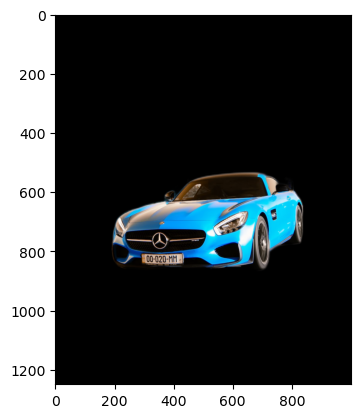

In [45]:
#img = cv2.imread('/Users/srijanratrey/Documents/Assignments/CV/car.jpeg')
from rembg import remove
from PIL import Image

# Load the image with a background
DD
input_image=cv2.imread('/Users/srijanratrey/Documents/Assignments/CV/car.jpeg')
plt.imshow(input_image)
# Save or display the result with the background removed
output.save('background_removed_image.png')  # Save the image
output.show()  # Display the image 
output=cv2.imread('background_removed_image.png')
plt.imshow(output)